In [11]:
pip install geopandas matplotlib

<ipython-input-13-2079651004cd>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-13-2079651004cd>:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(df.geometry.centroid.x, df.geometry.centroid.y, df['Country']):


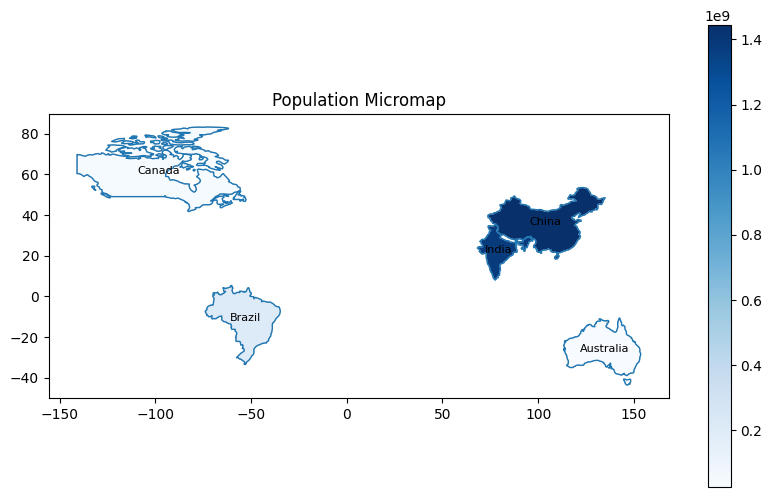

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Create a simple dataset with country names and population
data = {'Country': ['USA', 'Canada', 'Brazil', 'India', 'China', 'Australia'],
        'Population': [331002651, 37742154, 212559417, 1380004385, 1444216107, 25499884]}

# Convert the dataset to a GeoDataFrame with a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = world[world['name'].isin(data['Country'])]
df = df.merge(pd.DataFrame(data), how='left', left_on='name', right_on='Country')

# Plot the static micromap
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df.boundary.plot(ax=ax, linewidth=1)
df.plot(column='Population', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add labels and title
for x, y, label in zip(df.geometry.centroid.x, df.geometry.centroid.y, df['Country']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

plt.title('Population Micromap')
plt.show()